# Develop a program to Compute the correlation matrix to understand the relationships between pairs of features. Visualize the correlation matrix using a heatmap to know which variables have strong positive/negative correlations. Create a pair plot to visualize pairwise relationships between features. Use California Housing dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

## Correlation Matrix Calculation:
- Uses df.corr() to compute correlations between all pairs of features
- Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
- 0 means no linear correlation

In [3]:
# Compute the correlation matrix
correlation_matrix = df.corr()

## Heatmap Visualization:

- Uses seaborn's heatmap function
- Colors indicate correlation strength:
    - Red: Positive correlation
    - Blue: Negative correlation
    - White: No correlation
- The numbers in each cell show the exact correlation value
- The diagonal is always 1.0 (perfect correlation with itself)

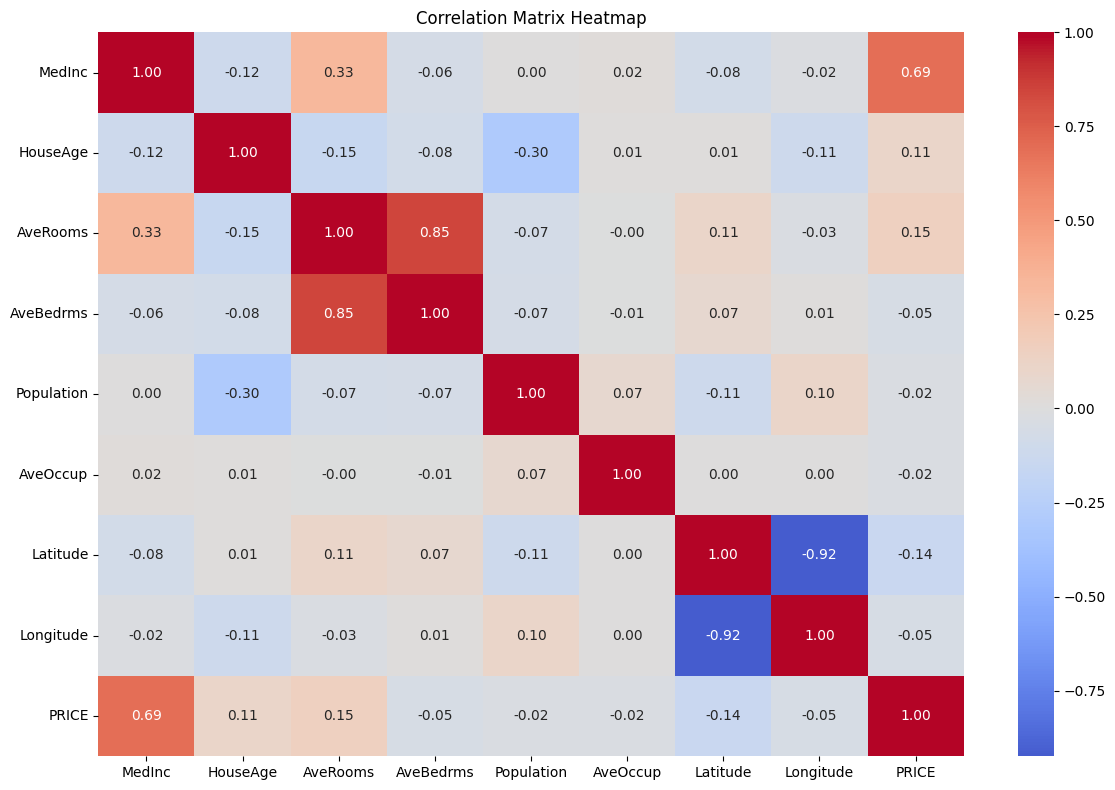

In [4]:
# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f')          # Round to 2 decimal places
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## Strong Correlations:

- Prints pairs of features with absolute correlation > 0.5
- These are the most significant relationships in the dataset

In [16]:
# Print strong correlations (absolute value > 0.5)
print("\nStrong Correlations (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.5:
            print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i,j]:.3f}")


Strong Correlations (|correlation| > 0.5):
MedInc - PRICE: 0.688
AveRooms - AveBedrms: 0.848
Latitude - Longitude: -0.925


## Pair Plot:

- Shows scatter plots for every pair of features
- Diagonal shows distribution of each feature
- Helps visualize relationships that might not be strictly linear

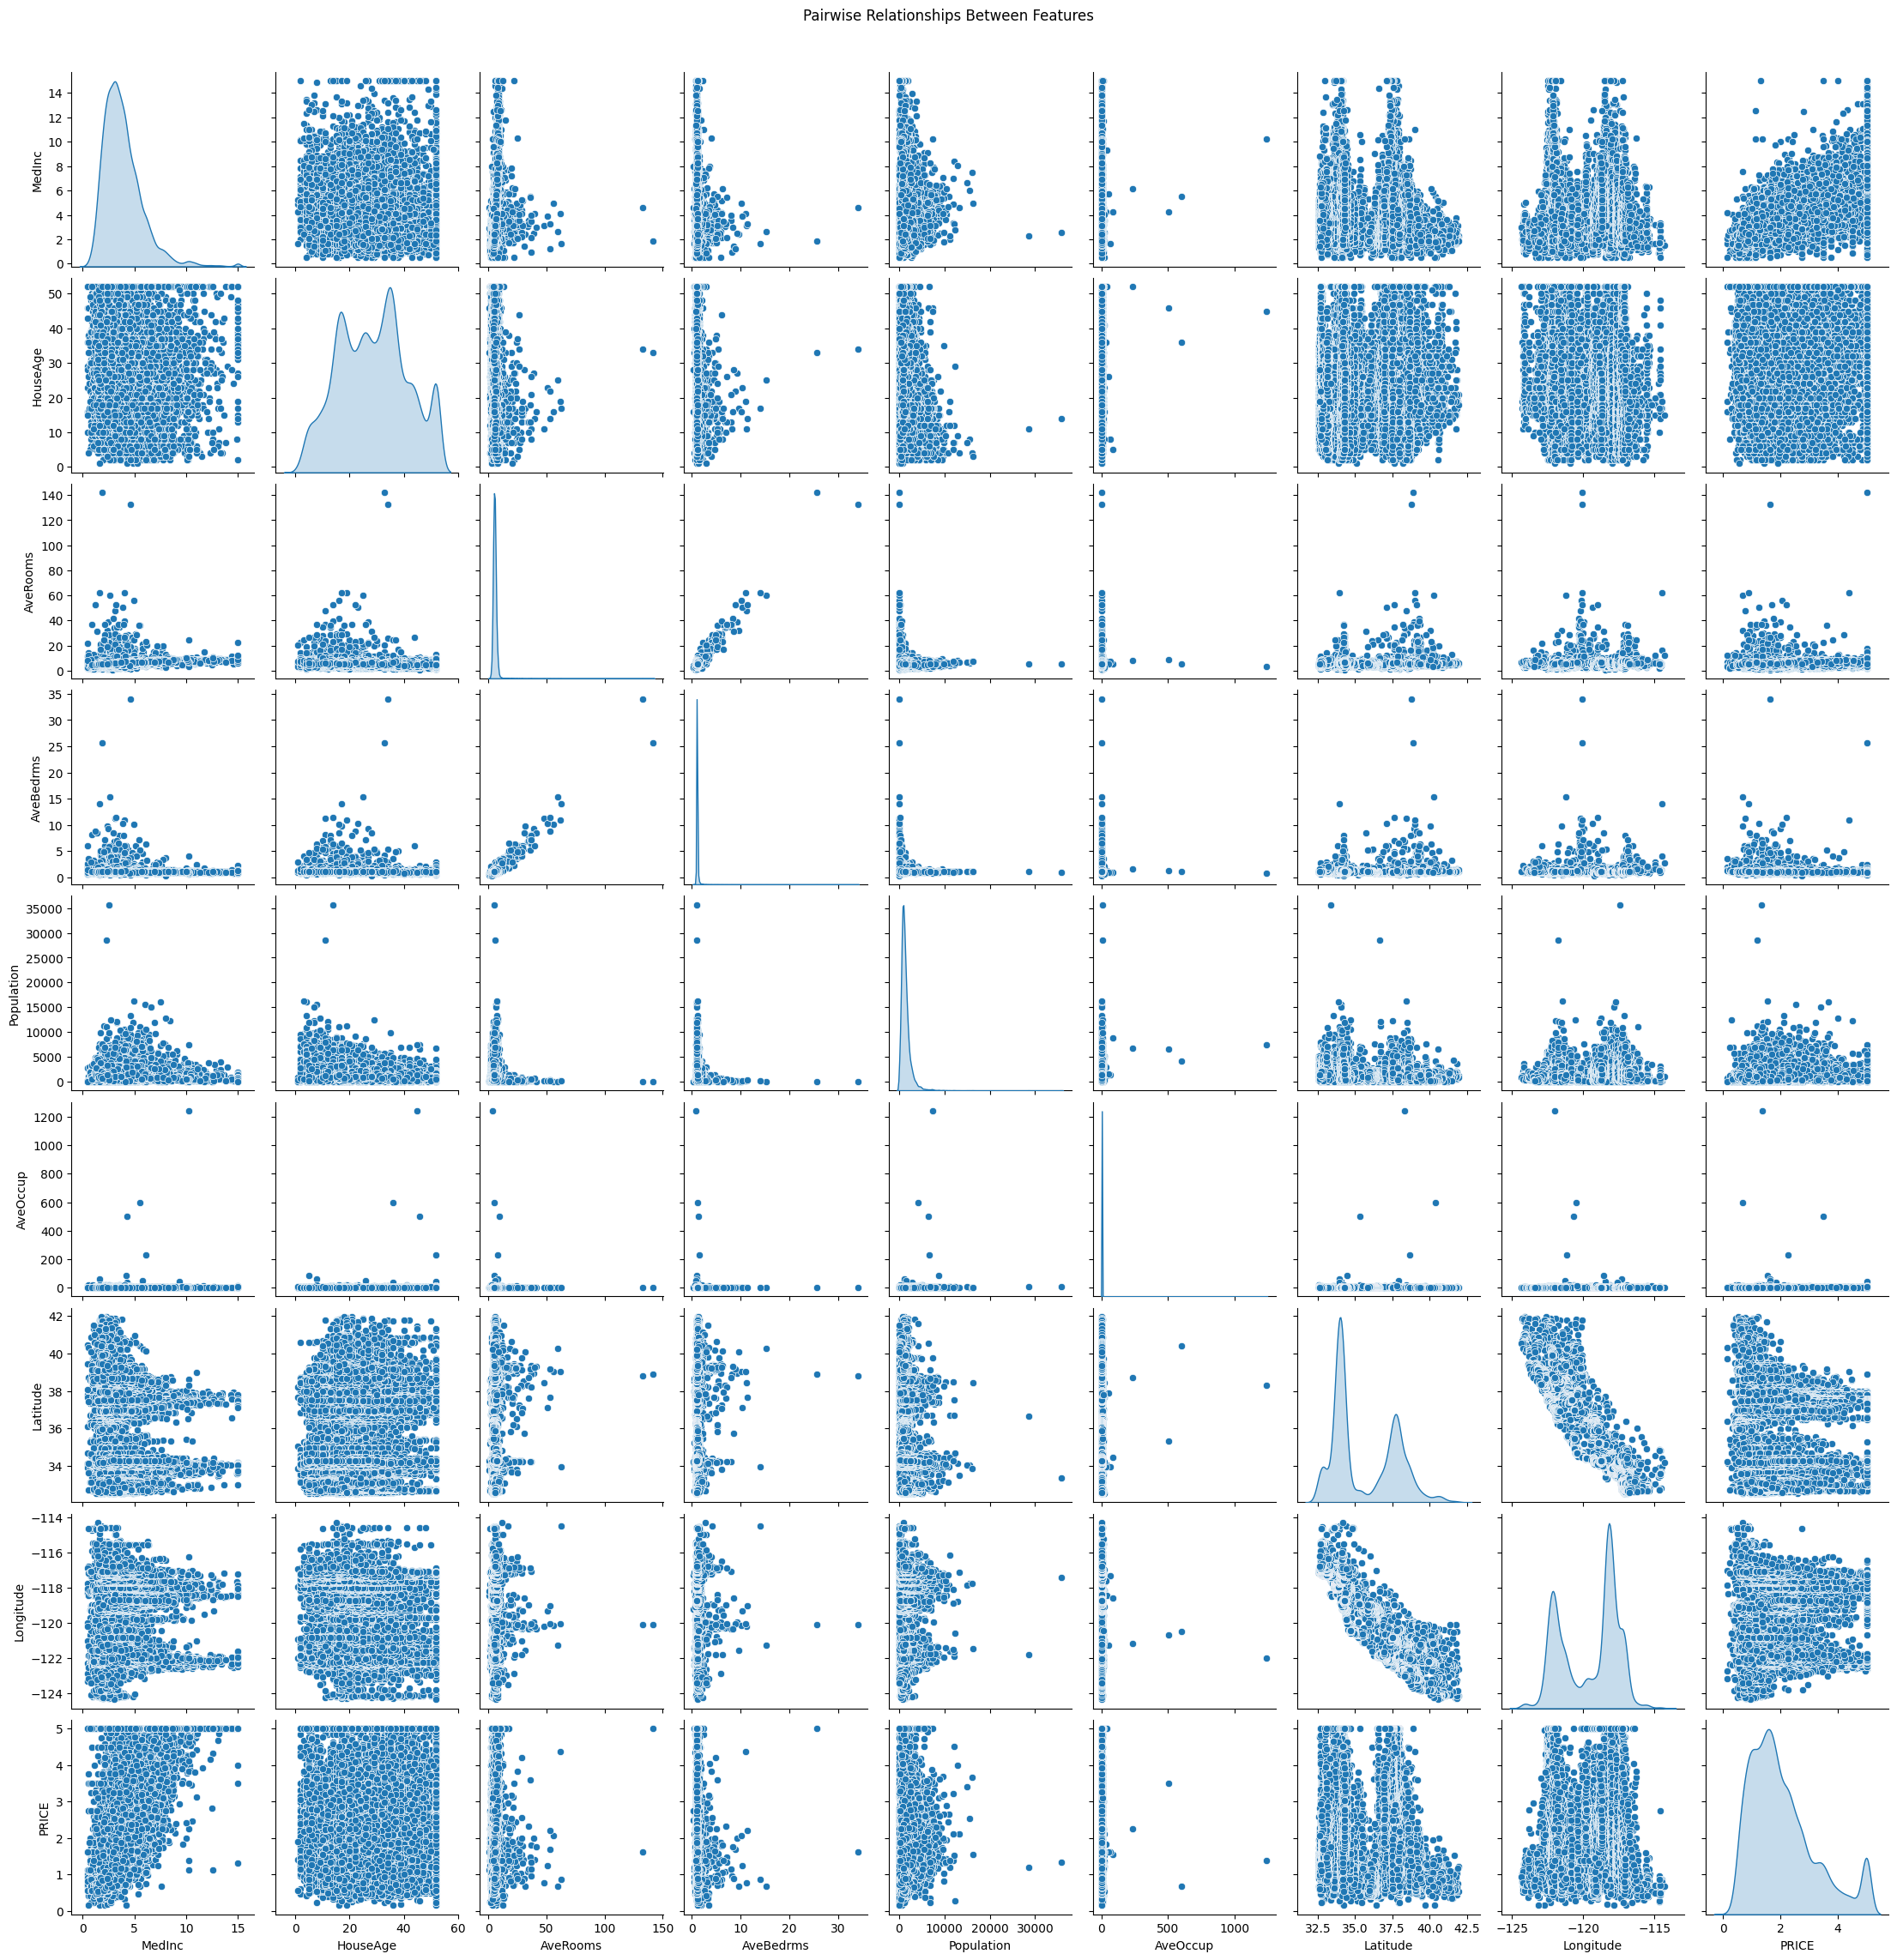

In [5]:
# Create a pair plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

## Key Findings in California Housing Dataset:

Strong Positive Correlations:
- AveRooms and AveBedrms (more rooms = more bedrooms)
- MedInc and PRICE (higher income areas = higher house prices)

Strong Negative Correlations:
- Latitude and PRICE (in California, southern areas tend to have higher prices)
- AveOccup and AveRooms (areas with more crowded housing tend to have fewer rooms)

Weak Correlations:
- HouseAge has relatively weak correlations with most features
- Population shows weak correlations with most features